In [6]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Attacker agent benchmark comparison in presence of a basic defender

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""
%matplotlib inline 

'Attacker agent benchmark comparison in presence of a basic defender\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [23]:
import sys
import logging
import gym
import importlib

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.defender import ScanAndReimageCompromisedMachines
from cyberbattle._env.cyberbattle_env import AttackerGoal, DefenderConstraint

importlib.reload(learner)
importlib.reload(p)
importlib.reload(p)


logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")


cyberbattlechain_defender = gym.make('CyberBattleChain-v0',
                                     size=10,
                                     attacker_goal=AttackerGoal(
                                         own_atleast=0,
                                         own_atleast_percent=1.0
                                     ),
                                     defender_constraint=DefenderConstraint(
                                         maintain_sla=0.80
                                     ),
                                     defender_agent=ScanAndReimageCompromisedMachines(
                                         probability=0.6,
                                         scan_capacity=2,
                                         scan_frequency=5))


ep = w.EnvironmentBounds.of_identifiers(
    maximum_total_credentials=22,
    maximum_node_count=22,
    identifiers=cyberbattlechain_defender.identifiers
)

iteration_count = 600
training_episode_count = 10

In [8]:
dqn_with_defender = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_defender,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.15,
        replay_memory_size=10000,
        target_update=5,
        batch_size=256,
        learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL"
)

###### DQL
Learning with: episode_count=10,iteration_count=600,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 600|reward:  528.0|last_reward_at:  600|Elapsed Time: 0:00:03||


  Episode 1 stopped at t=600 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/89 (0.07)
    explore-remote: 7/218 (0.03)
    explore-connect: 3/200 (0.01)
    exploit-local: 2/15 (0.12)
    exploit-remote: 1/31 (0.03)
    exploit-connect: 1/26 (0.04)
  exploit deflected to exploration: 6
  ## Episode: 2/10 'DQL' ϵ=0.8097, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 600|reward:  906.0|last_reward_at:  600|Elapsed Time: 0:00:05||


  Episode 2 stopped at t=600 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/81 (0.08)
    explore-remote: 12/165 (0.07)
    explore-connect: 0/192 (0.00)
    exploit-local: 5/22 (0.19)
    exploit-remote: 3/47 (0.06)
    exploit-connect: 7/59 (0.11)
  exploit deflected to exploration: 11
  ## Episode: 3/10 'DQL' ϵ=0.7294, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 266|reward: 7248.0|last_reward_at:  266|Elapsed Time: 0:00:02||


  Episode 3 ended at t=266 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/38 (0.10)
    explore-remote: 9/52 (0.15)
    explore-connect: 4/81 (0.05)
    exploit-local: 12/2 (0.86)
    exploit-remote: 8/25 (0.24)
    exploit-connect: 7/24 (0.23)
  exploit deflected to exploration: 1
  ## Episode: 4/10 'DQL' ϵ=0.6968, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 66|reward: 5364.0|last_reward_at:   66|Elapsed Time: 0:00:00||


  Episode 4 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/11 (0.00)
    explore-remote: 4/11 (0.27)
    explore-connect: 0/15 (0.00)
    exploit-local: 3/1 (0.75)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'DQL' ϵ=0.6890, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 191|reward: 5656.0|last_reward_at:  191|Elapsed Time: 0:00:01||


  Episode 5 ended at t=191 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/19 (0.24)
    explore-remote: 10/42 (0.19)
    explore-connect: 1/52 (0.02)
    exploit-local: 4/0 (1.00)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 5/44 (0.10)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'DQL' ϵ=0.6669, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 311|reward: 6288.0|last_reward_at:  311|Elapsed Time: 0:00:02||


  Episode 6 ended at t=311 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/33 (0.08)
    explore-remote: 16/68 (0.19)
    explore-connect: 3/86 (0.03)
    exploit-local: 18/32 (0.36)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 8/39 (0.17)
  exploit deflected to exploration: 11
  ## Episode: 7/10 'DQL' ϵ=0.6327, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 101|reward: 6120.0|last_reward_at:  101|Elapsed Time: 0:00:01||


  Episode 7 ended at t=101 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 6/15 (0.29)
    explore-connect: 1/17 (0.06)
    exploit-local: 16/4 (0.80)
    exploit-remote: 2/3 (0.40)
    exploit-connect: 9/11 (0.45)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'DQL' ϵ=0.6221, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 141|reward: 5966.0|last_reward_at:  141|Elapsed Time: 0:00:01||


  Episode 8 ended at t=141 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 8/36 (0.18)
    explore-connect: 0/30 (0.00)
    exploit-local: 11/3 (0.79)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 8/16 (0.33)
  exploit deflected to exploration: 9
  ## Episode: 9/10 'DQL' ϵ=0.6076, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 36|reward: 5602.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 9 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/6 (0.25)
    explore-connect: 1/8 (0.11)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 1
  ## Episode: 10/10 'DQL' ϵ=0.6039, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 51|reward: 5736.0|last_reward_at:   51|Elapsed Time: 0:00:00||


  Episode 10 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 4/7 (0.36)
    explore-connect: 1/15 (0.06)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 6/1 (0.86)
  exploit deflected to exploration: 0
simulation ended


In [9]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=dqn_with_defender['learner'],
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    # render_last_episode_rewards_to='images/chain10',
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=600,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 46|reward: 7214.0|last_reward_at:   46|Elapsed Time: 0:00:00||


  Episode 1 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 20/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 12/11 (0.52)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 41|reward: 6084.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 2 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 18/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 9/13 (0.41)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 51|reward: 7208.0|last_reward_at:   51|Elapsed Time: 0:00:00||


  Episode 3 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 20/1 (0.95)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 12/18 (0.40)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 36|reward: 6082.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 4 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/9 (0.53)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 36|reward: 6214.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 5 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 76|reward: 7220.0|last_reward_at:   76|Elapsed Time: 0:00:00||


  Episode 6 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/1 (0.95)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 12/41 (0.23)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 36|reward: 7190.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 7 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 12/6 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 41|reward: 7196.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 8 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 18/1 (0.95)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 61|reward: 6200.0|last_reward_at:   61|Elapsed Time: 0:00:00||


  Episode 9 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/3 (0.85)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 10/25 (0.29)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 41|reward: 5942.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 10 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 14/2 (0.88)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 8/15 (0.35)
  exploit deflected to exploration: 0
simulation ended


In [10]:
credlookup_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=600,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 266|reward: 5649.0|last_reward_at:  266|Elapsed Time: 0:00:00||


  Episode 1 ended at t=266 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/82 (0.12)
    explore-remote: 10/137 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/21 (0.19)
  exploit deflected to exploration: 4
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8791, 


Episode 2|Iteration 176|reward: 5755.0|last_reward_at:  176|Elapsed Time: 0:00:00||


  Episode 2 ended at t=176 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/41 (0.21)
    explore-remote: 11/98 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/9 (0.40)
  exploit deflected to exploration: 2
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8655, 


Episode 3|Iteration 241|reward: 5910.0|last_reward_at:  241|Elapsed Time: 0:00:00||


  Episode 3 ended at t=241 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/67 (0.18)
    explore-remote: 13/123 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/16 (0.30)
  exploit deflected to exploration: 7
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8473, 


Episode 4|Iteration 196|reward: 5666.0|last_reward_at:  196|Elapsed Time: 0:00:00||


  Episode 4 ended at t=196 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/51 (0.18)
    explore-remote: 12/104 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 14
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8328, 


Episode 5|Iteration 86|reward: 5726.0|last_reward_at:   86|Elapsed Time: 0:00:00||


  Episode 5 ended at t=86 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/25 (0.24)
    explore-remote: 9/35 (0.20)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/3 (0.67)
  exploit deflected to exploration: 9
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8265, 


Episode 6|Iteration 346|reward: 6012.0|last_reward_at:  346|Elapsed Time: 0:00:00||


  Episode 6 ended at t=346 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/102 (0.12)
    explore-remote: 13/163 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/45 (0.17)
  exploit deflected to exploration: 15
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8018, 


Episode 7|Iteration 326|reward: 5779.0|last_reward_at:  326|Elapsed Time: 0:00:00||


  Episode 7 ended at t=326 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/104 (0.10)
    explore-remote: 14/150 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/40 (0.13)
  exploit deflected to exploration: 30
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7793, 


Episode 8|Iteration 106|reward: 5618.0|last_reward_at:  106|Elapsed Time: 0:00:00||


  Episode 8 ended at t=106 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/22 (0.24)
    explore-remote: 10/50 (0.17)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/12 (0.29)
  exploit deflected to exploration: 8
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7721, 


Episode 9|Iteration 396|reward: 6128.0|last_reward_at:  396|Elapsed Time: 0:00:00||


  Episode 9 ended at t=396 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/113 (0.12)
    explore-remote: 14/173 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/70 (0.12)
  exploit deflected to exploration: 25
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7460, 


Episode 10|Iteration 206|reward: 5659.0|last_reward_at:  206|Elapsed Time: 0:00:00||


  Episode 10 ended at t=206 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/63 (0.15)
    explore-remote: 12/81 (0.13)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/34 (0.13)
  exploit deflected to exploration: 17
simulation ended


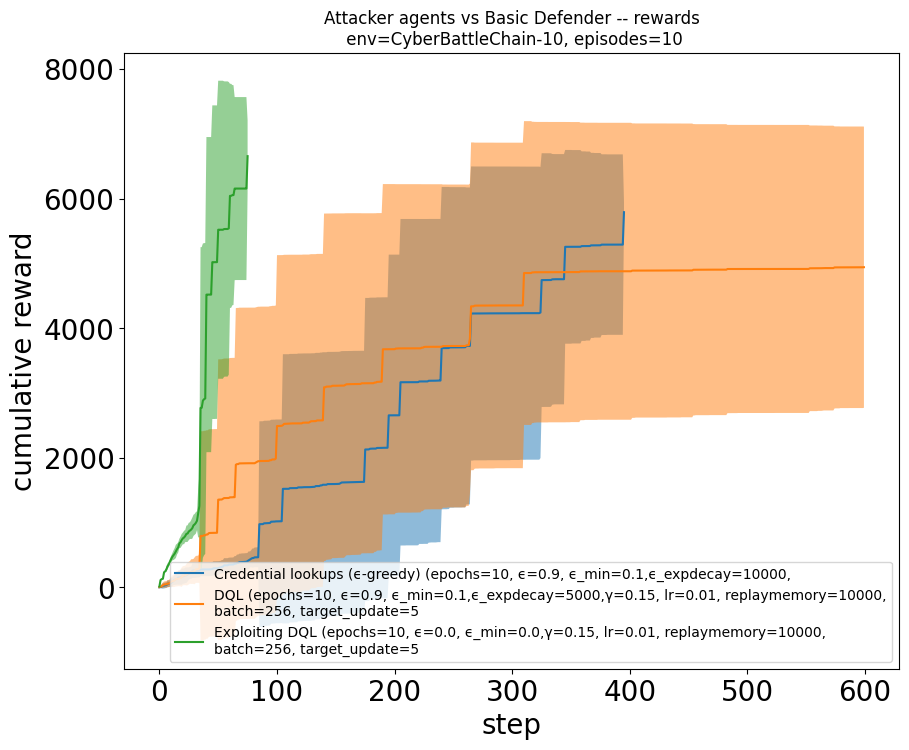

In [49]:
import matplotlib
# Plots
all_runs = [
    credlookup_run,
    dqn_with_defender,
    dql_exploit_run
]
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Attacker agents vs Basic Defender -- rewards\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}',
    show=False
)

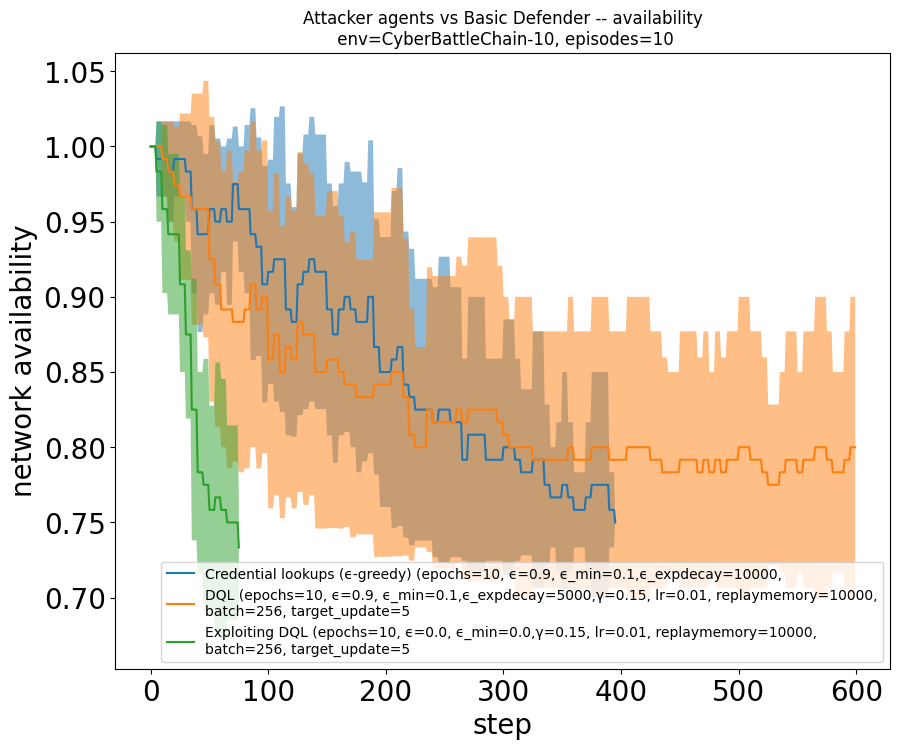

In [50]:
# p.plot_episodes_length(all_runs)
p.plot_averaged_availability(title=f"Attacker agents vs Basic Defender -- availability\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", all_runs=all_runs, show=False)

In [51]:
matplotlib.pyplot.show()